<a href="https://colab.research.google.com/github/ranj10/Predicting_Bank_deposit_subscription/blob/main/Predicting_Bank_deposit_subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction: When a customer places funds in a term deposit, it’s similar to a loan to the bank. The bank will hold the funds for a set time and can use them to invest elsewhere to make a return. Let’s say the bank gives the initial depositor a return of 2% for the use of funds in a term deposit. The bank can then use the money on deposit for a loan to a customer, charging a 6% interest rate for a net margin of 4%. Term deposits can help keep their financial operation running.

AIM: Considering certain factors we need to classify whether or not a customer subscribes to the term deposit upon getting a call from a bank’s representative.

In [ ]:
# Installing pyforest
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=89cae74675684e02d0677a6ae7c9e10ea49ed5f35d57e21bf7934cb0099182db
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [ ]:
#importing pyforest
from pyforest import *   # if you install pyforest and import everything from it, it covers most of the libraries we require.
# I am reading the file below without importing pandas , that was possible because of pyforest

In [ ]:
#reading data
data=pd.read_csv("bank-term-deposit.csv")

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

Although there are many definations for EDA,we want you to understand the objective of performing EDA.

Through EDA we get answers for a few questions before getting started with the data cleaning and building statistical models.

The questions we need to answers through EDA could be,

1. What are the basic traits of the dataset we are going to work on?
ex: it's shape, datatypes, description, uniqueness, size, missing values.

2. Is the data sufficient? the reason for this question is some algorithms need good amount of data to produce efficient results?

3. do the Independent variables have any relationship between them?
ex: multicolinearlity, how strong are they related to target variable?

4. What can we deduce from each of the variables(through visuals)?

5. What can we deduce from the relationship between each of the variables(multivariate analysis)?

4. lastly, the type and complexity of the dataset.

In [ ]:
data.head(5)

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.isnull().sum()

Age             0
Job             0
Marital         0
Education       0
Default         0
housing         0
Loan            0
Contact         0
Month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [ ]:
data["Job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [ ]:
data.shape

(41188, 21)

<AxesSubplot:>

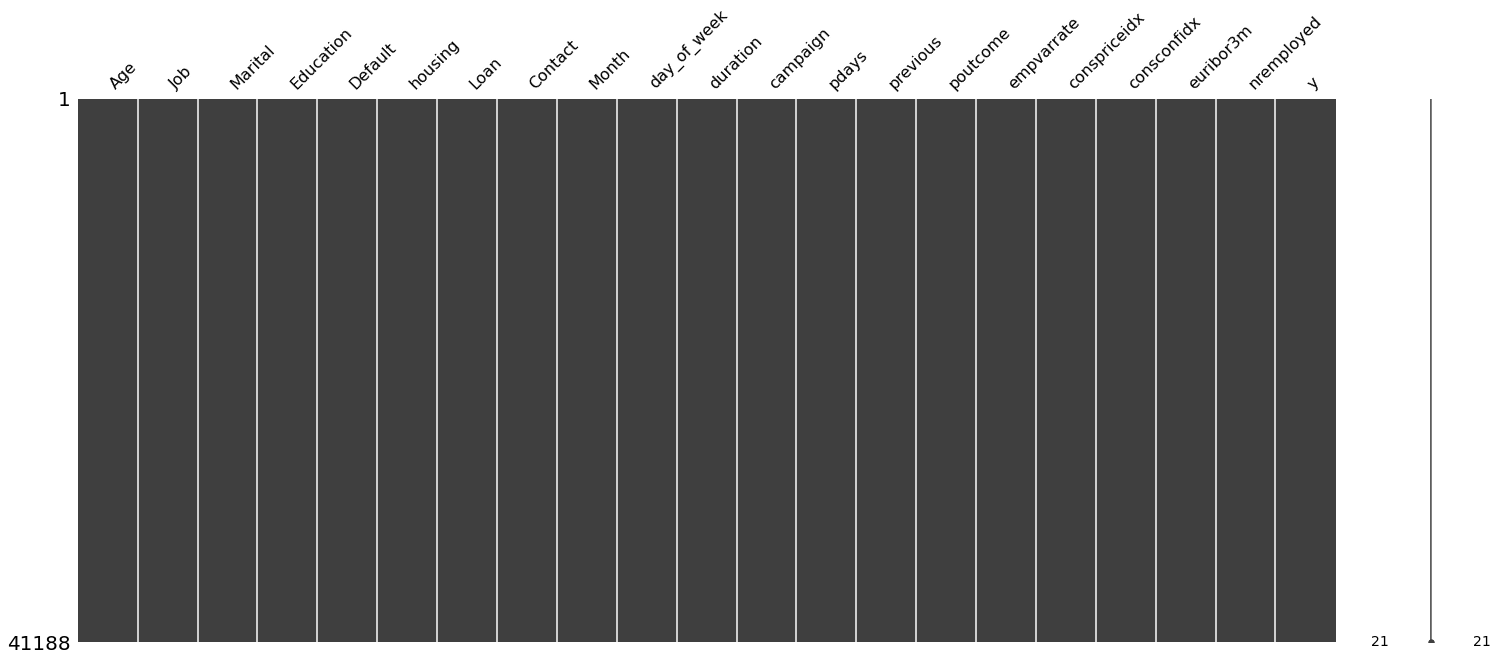

In [ ]:
# Let's check the presence of missing values using missingno.
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(data)

We can be certain that we have no missing values in the dataset after viewing the above plot

In [ ]:
data.describe()

,Age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.describe(include = 'all')

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
# exploring all rows and columns
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(data)

In [ ]:
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
data.info() #age, duration,campaign,pdays,previous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [ ]:
# Checking the balance of Target variable and will apply smote later.
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
data = pd.DataFrame(data) # checking correlation
print(data.corr(method = 'spearman'))

<IPython.core.display.Javascript object>

                   Age  duration  campaign     pdays  previous  empvarrate  \
Age           1.000000 -0.002123  0.005715 -0.001062 -0.012643    0.045003   
duration     -0.002123  1.000000 -0.080953 -0.083072  0.042407   -0.069201   
campaign      0.005715 -0.080953  1.000000  0.055514 -0.087420    0.156360   
pdays        -0.001062 -0.083072  0.055514  1.000000 -0.509583    0.227698   
previous     -0.012643  0.042407 -0.087420 -0.509583  1.000000   -0.435293   
empvarrate    0.045003 -0.069201  0.156360  0.227698 -0.435293    1.000000   
conspriceidx  0.044790  0.002854  0.096494  0.056763 -0.282720    0.664890   
consconfidx   0.114536 -0.008678 -0.001554 -0.077265 -0.115967    0.224693   
euribor3m     0.054391 -0.078346  0.140512  0.278488 -0.454724    0.939915   
nremployed    0.044789 -0.095225  0.144264  0.290673 -0.438721    0.944702   

              conspriceidx  consconfidx  euribor3m  nremployed  
Age               0.044790     0.114536   0.054391    0.044789  
duration   

Here are some of the visuals and the insights corresponding to them. we recommend you to create more visuals and provide insights accordingly.

In [ ]:
# Checking the count of clients of each job role
fig=px.bar(data.Job.value_counts().reset_index().rename(columns={'index':'Job','Job':'Count'}),x='Job',y='Count',color='Job',text='Count')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5,title_text='<b>Job types of the clients')

**Insights**
1. Clients with admin as job type are maximum in the bank and the least are unknown job type clients.
2. Blue-collar job clients take the second place from the top.

In [ ]:
a=data.groupby(['Month','y'],as_index=False)['Age'].count().rename(columns={'Age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Month',y='Count',text='percent',color='y',barmode='group',color_discrete_sequence=['brown','tomato'])
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits(y) based on last Contact month')
fig.update_traces(marker=dict(line=dict(color='#00FFFF', width=1)),textposition = "outside")
fig.show()

Insights:

1.May, June, July and August seemingly had more clients contacted but the outcome was miserable as they did not subsribe to the term deposit during those months.

2. March, September, October and Dec had less clients contacted but more people got converted comparatively. Therefore, banks can target these months to contact more to get more subscriptions.

In [ ]:
fig=px.line(data.groupby(['campaign','y'],as_index=False)['Age'].count().rename(columns={'Age':'Count'}),x='campaign',y='Count',color='y',color_discrete_sequence=['red','dimgray'])
fig.update_layout(title_x=0.5,legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed during the campaign and for this client </b>')
fig.show()

Insights:

1. The lesser the contacts performed for the clients the more they tend to subscribe.

2. The more the contacts performed for the clients the less they tend to subscribe.

Bivariate Analysis -

Bivariate analysis involves checking the relationship between two variables.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

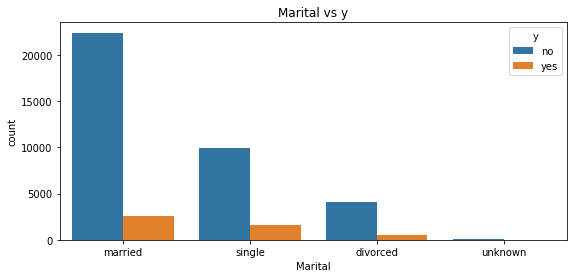

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Marital"],hue=data['y'],data=data)
plt.title("Marital vs y")
plt.xticks(rotation=0)

Insights: Most of the married people have declined the subscription followed by Singles and divorced.

That said, Out of all people who have subscribed, married people have the highest subscriptions followed by other two.

Note: Please perform bivaritae analysis on other columns too

Feature Engineering - It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

It includes feature creation, Feature scaling,feature extraction and feature selection.

In [ ]:
# label encoding for the categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["Job","Marital", "Education", "Default", "day_of_week","Month","poutcome","Contact","housing","Loan","y"]:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
data.head(5)

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

<IPython.core.display.Javascript object>

         feature           VIF
0            Age     19.748825
1            Job      2.120196
2        Marital      5.655898
3      Education      4.466418
4        Default      1.405036
5        housing      2.205621
6           Loan      1.207807
7        Contact      2.867721
8          Month      6.844007
9    day_of_week      3.086377
10      duration      2.451693
11      campaign      1.930696
12         pdays    166.369670
13      previous      5.964609
14      poutcome     34.178782
15    empvarrate     40.727910
16  conspriceidx  38881.736440
17   consconfidx    131.859364
18     euribor3m    333.532385
19    nremployed  44301.582935
20             y      1.714507


In [ ]:
#split data
# Also I am dropping the columns based on the results I have gotten from VIF. anything above 5 is excluded from the dataset
X=data.drop(["nremployed","euribor3m","conspriceidx","consconfidx","pdays","Age","poutcome","empvarrate","y"], axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#X.columns

<IPython.core.display.Javascript object>

(28831, 12)
(28831,)
(12357, 12)
(12357,)


In [ ]:
X.columns

Index(['Job', 'Marital', 'Education', 'Default', 'housing', 'Loan', 'Contact',
       'Month', 'day_of_week', 'duration', 'campaign', 'previous'],
      dtype='object')

# Feature Scaling

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.03362777, -0.28835206,  1.05155724, ..., -0.69511644,
         0.15413935,  1.67379958],
       [ 1.47115571,  1.3510639 ,  1.05155724, ..., -0.94491621,
         0.51747772, -0.34914386],
       [-0.7553185 , -0.28835206, -1.28865478, ...,  0.07349826,
        -0.20919902, -0.34914386],
       ...,
       [-1.03362777, -0.28835206, -0.35256997, ..., -0.24547684,
        -0.57253738,  1.67379958],
       [ 0.07960933, -0.28835206,  1.05155724, ...,  0.14267359,
        -0.20919902, -0.34914386],
       [-1.03362777,  1.3510639 ,  1.05155724, ...,  0.28871038,
        -0.20919902, -0.34914386]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[ 1.47115571, -0.28835206, -0.35256997, ...,  0.43474717,
        -0.57253738,  1.67379958],
       [ 2.02777426, -0.28835206,  1.51959964, ...,  0.10424285,
        -0.20919902, -0.34914386],
       [-0.7553185 , -0.28835206, -0.82061238, ..., -0.79119327,
        -0.57253738,  1.67379958],
       ...,
       [-0.7553185 ,  1.3510639 , -0.35256997, ..., -0.02642165,
        -0.20919902, -0.34914386],
       [ 1.47115571, -1.92776803,  0.58351483, ..., -0.79887942,
         0.15413935, -0.34914386],
       [ 1.47115571, -0.28835206,  1.05155724, ..., -0.14171385,
        -0.20919902,  1.67379958]])

The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

<IPython.core.display.Javascript object>

        feature       VIF
0           Job  2.034305
1       Marital  3.985834
2     Education  3.632271
3       Default  1.273387
4       housing  2.057358
5          Loan  1.196315
6       Contact  1.860439
7         Month  4.044558
8   day_of_week  2.725738
9      duration  1.880603
10     campaign  1.768809
11     previous  1.217547


In [ ]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

#Feature Selection

In [ ]:
#selectkmethod does not work here since we have negative values.

<IPython.core.display.Javascript object>

Feature: 0, Score: 0.09167
Feature: 1, Score: 0.04859
Feature: 2, Score: 0.02390
Feature: 3, Score: 0.04371
Feature: 4, Score: 0.00896
Feature: 5, Score: 0.02064
Feature: 6, Score: 0.01492
Feature: 7, Score: 0.00973
Feature: 8, Score: 0.01832
Feature: 9, Score: 0.04025
Feature: 10, Score: 0.32217
Feature: 11, Score: 0.04268
Feature: 12, Score: 0.02626
Feature: 13, Score: 0.01409
Feature: 14, Score: 0.03810
Feature: 15, Score: 0.01907
Feature: 16, Score: 0.02223
Feature: 17, Score: 0.02640
Feature: 18, Score: 0.10708
Feature: 19, Score: 0.06122


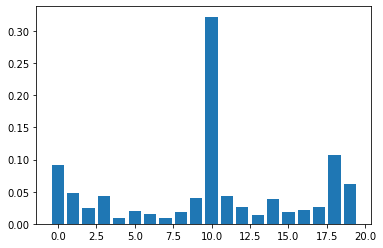

In [ ]:
# Feature Importance
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_


Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'housing', 'Loan',
       'Contact', 'Month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed'],
      dtype='object')
[ True  True False  True False False False False False  True  True  True
  True False False False False  True  True  True]


array([ 1,  1,  2,  1,  9,  3,  6, 10,  4,  1,  1,  1,  1,  5,  8, 11,  7,
        1,  1,  1])

1 represents the top most impactful features to be used for the model training and the rest of the features have ranking as per their significance.

Wherever you find True that is one of the features to select.

please implement only these features in your final model and demonstrate the difference when used feature selection and when not used.



Note : I am not considering feature selection and multicolinearity results. you may choose to do it and observe the differece.

Assumptions of Logistic Regression

(a) binary logistic regression requires the dependent variable to be binary and

(b) ordinal logistic regression requires the dependent variable to be ordinal.

(c)Observations should be independent of each other
little or no multi-collinearity among the independent variables


## Note:Please implement only Logistic regression for now.however, once you are done with all the remaining models in the class you can implement them to compare results.

Importing different Libraries for models building.

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# Model builing on imbalanced dataset

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.90
- F1 score: 0.875390
- Precision: 0.875215
- Recall: 0.896327
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.88
- Precision: 0.88
- Recall: 0.90


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.87
- Fl score: 0.87
- Precision: 0.87
- Recall: 0.87


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.89
- Precision: 0.89
- Recall: 0.90


Support Vector Machine
Model performance for Training set
- Accuracy: 0.90
- F1 score: 0.878192
- Precision: 0.887829
- Recall: 0.902397
----------------------------------
Model performance for Test set
-

Observations: From the metrics of above models, we can see decision tree and Random forest are overfitting and rest of the models produce almost similar accuracy.

Moreover, these results are based on imbalanced dataset. therefore, we need to perform smote to balance our dataset and apply these models and compare results.

# SMOTE- for Imbalanced dataset

In [ ]:
pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)



In [ ]:
y_smote.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)


<IPython.core.display.Javascript object>

In [ ]:
#Model building after applying SMOTE

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    #"Support Vector Machine": svm.SVC(),
    #"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Training each of the Models


    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.83
- F1 score: 0.825647
- Precision: 0.826114
- Recall: 0.825708
----------------------------------
Model performance for Test set
- Accuracy: 0.82
- Fl score: 0.82
- Precision: 0.82
- Recall: 0.82


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.999902
- Precision: 0.999902
- Recall: 0.999902
----------------------------------
Model performance for Test set
- Accuracy: 0.89
- Fl score: 0.89
- Precision: 0.89
- Recall: 0.89


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.999883
- Precision: 0.999883
- Recall: 0.999883
----------------------------------
Model performance for Test set
- Accuracy: 0.92
- Fl score: 0.92
- Precision: 0.92
- Recall: 0.92




Observations: After performing smote, we see that Decision tree and random forest still overfit whereas Logisitc regression looks good comparatively.

In conclusion, We have trained different models on our dataset and determined a few of them worked better and others overfit. Therefore, we could choose the model of our choice from the better models to classify whether or not person subscribes to term deposit.